<IPython.core.display.Javascript object>


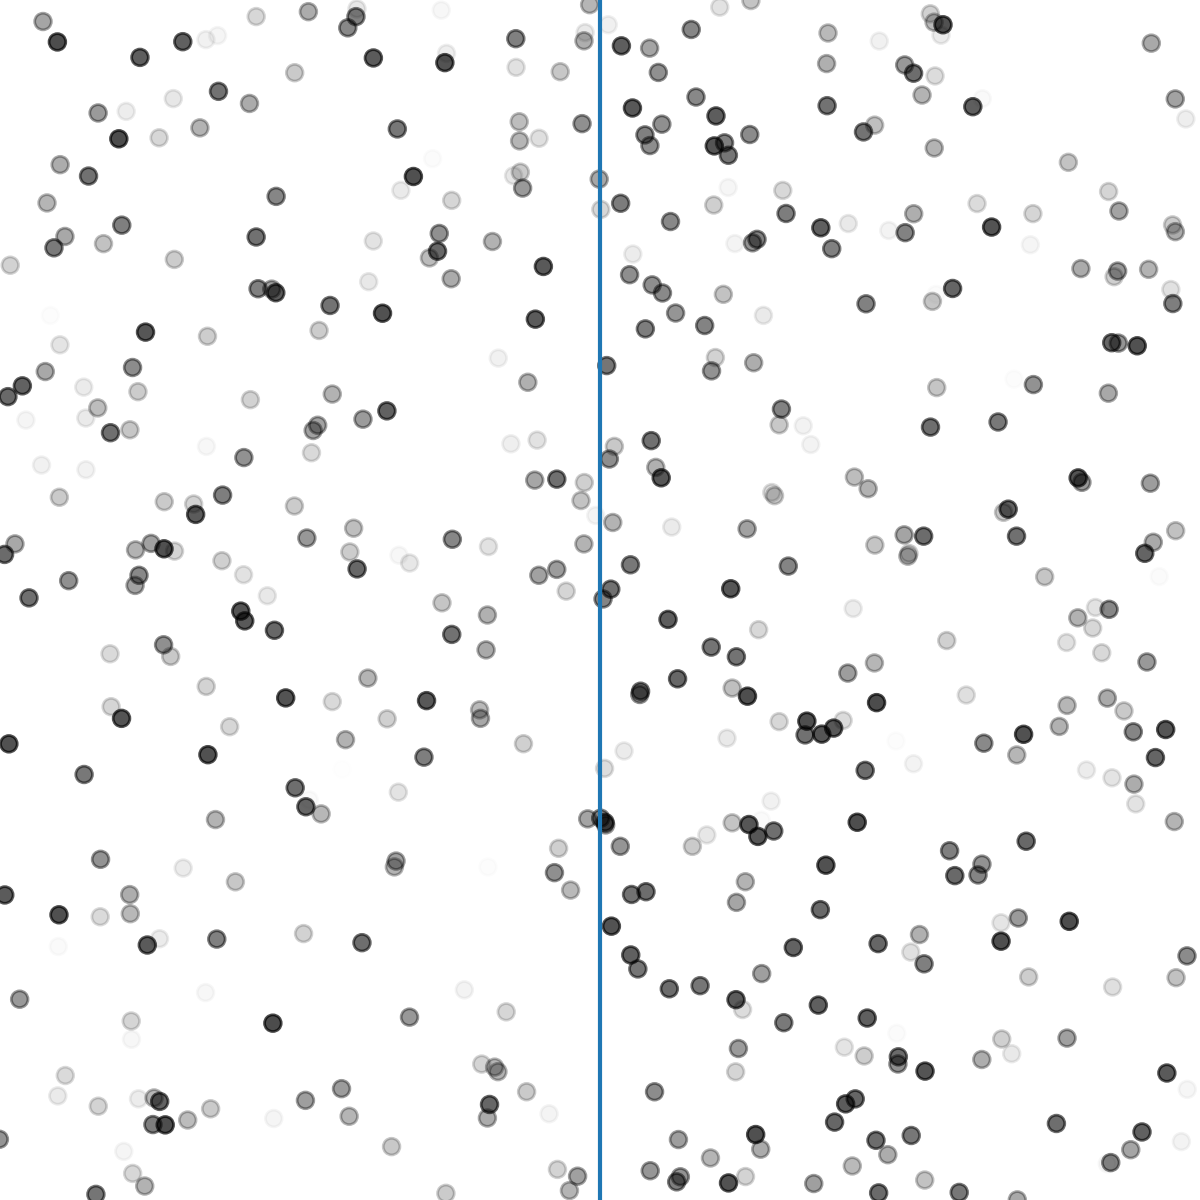

<function matplotlib.pyplot.show(*args, **kw)>

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# fixed random seed
np.random.seed(8675309)

# create an empty box for particles
box = plt.figure(figsize=(6, 6))
ax = box.add_axes([0,0,1,1], frameon=False)
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

# create structured array of particles
n_particles = 500
particles = np.zeros(n_particles, dtype=[('position', float, 2),
                                         ('position_prev', float, 2),
                                         ('speed', float, 2),
                                         ('color', float, 4)])

# initialize particles: random speed, random position; color = sqrt(xspd^2 + yspd^2)
particles['position'] = np.random.uniform(0,1,(n_particles, 2))
particles['speed'] = np.random.uniform(-0.005,0.005, (n_particles, 2))
particles['color'][:, 3] = np.sqrt(np.add(np.square(particles['speed'][:, 0]),
                                            np.square(particles['speed'][:, 0]))) * 100

# make scatter plot which will be updated
scat = ax.scatter(particles['position'][:,0], particles['position'][:,1], facecolors=particles['color'])

# add demon gate
gate = ax.plot([.5, .5],[0,1])


def update(frame_number):
    # update particle position based on speed and direction
    particles['position'][:, 0] += particles['speed'][:, 0]
    particles['position'][:, 1] += particles['speed'][:, 1]
        
    for p in particles:
        
        # check for wall collisions and bounce
        if p['position'][0] > 1 or p['position'][0] < 0:
            p['speed'][0] *= -1
        if p['position'][1] > 1 or p['position'][1] < 0:
            p['speed'][1] *= -1
            
        # check for speed at gate and bounce
        if p['position'][0] > 0.5 and p['position_prev'][0] < 0.5 and p['color'][3] < 0.35:
            p['speed'][0] *= -1
        if p['position'][0] < 0.5 and p['position_prev'][0] > 0.5 and p['color'][3] >= 0.35:
            p['speed'][0] *= -1
        
        # update previous particle positions for gate check
        p['position_prev'] = p['position']
        
    # update scatter plot
    scat.set_offsets(particles['position'])

# make the animation using the update function as the director    
animation = FuncAnimation(box, update, interval=30)
plt.show